# 과제: MNIST 데이터를 나만의 NN model로 95 % 이상의 성능으로 training 시켜보자!


## Loading MNIST training data

In [1]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Scaling(image data는 min-max scaling 주로 사용)
x_train = x_train/255.0
x_test = x_test/255.0

11493376/11490434 [==============================] - 0s 0us/step


## Training Data
28 * 28 pixel 값을 가진 총 60000개의 이미지 데이터

In [2]:
x_train.shape 

(60000, 28, 28)

Neural network 모델에 맞게 이미지 데이터를 벡터 형태로 데이터를 reshape 합니다.  
(Model을 만들 때 *keras.layers.Flatten(input_shape=(28, 28)) 이용해도 됨)

In [ ]:
# x_train, x_test = x_train.reshape((-1, 28*28)), x_test.reshape((-1, 28*28))
# x_train.shape, x_test.shape

((60000, 784), (10000, 784))

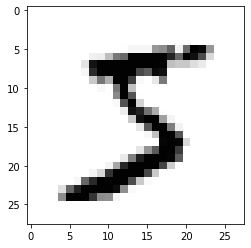

In [3]:
plt.imshow(x_train[0]).set_cmap('Greys')

## Training Labels
이미지 데이터가 나타내는 숫자값을 label로 가지고 있고, 0부터 9까지의 값을 나타냄  
마찬가지로, 60000개의 label이 존재

In [4]:
y_train.shape

(60000,)

In [5]:
# show MNIST label for above data
y_train[0]

5

## 나만의 모델을 tensorflow keras API 를 이용해 만들어 봅시다~

* parameters for model

In [6]:
activation_list = ["sigmoid", "relu", "softmax", "tanh"]

loss_list = ["sparse_categorical_crossentropy",
             "categorical_crossentropy", 
             "binary_crossentropy"]

optimizer_list = ["sgd", "adam", "rmsprop", "adagrad"]

initializer_list = [tf.keras.initializers.RandomNormal(), 
                    tf.keras.initializers.RandomUniform(), 
                    tf.keras.initializers.he_normal(), 
                    tf.keras.initializers.he_uniform(), 
                    tf.keras.initializers.GlorotUniform(),
                    tf.keras.initializers.GlorotNormal()]

# # dropout
# dropout_rate = 0.3
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(256, input_dim=784, activation = "sigmoid"),
#     tf.keras.layers.Dense(2, activation = "sigmoid"),
#     tf.keras.layers.Dropout(dropout_rate)
# ])


# # regularizer
# regularizer = tf.keras.regularizers.l1(1e-3)
# regularizer = tf.keras.regularizers.l2(1e-3)
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
#                           activity_regularizer=regularizer)
# ])

# # weight initialization
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
#                           kernel_initializer=initializer_list[0])
# ])

#### My Own Model 

In [11]:
#### 자유롭게 Model을 만들고 compile 해봅시다 ####
regularizer = tf.keras.regularizers.l1(1e-3)
dropout_rate = 0.2

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation="sigmoid", activity_regularizer=regularizer),
    keras.layers.Dense(100, activation="sigmoid", activity_regularizer=regularizer),
    keras.layers.Dense(100, activation="sigmoid", activity_regularizer=regularizer),
    keras.layers.Dense(100, activation="softmax", activity_regularizer=regularizer),
    keras.layers.Dropout(dropout_rate)
    ])

model.compile(loss = "sparse_categorical_crossentropy", 
              optimizer = "adam",
              metrics = ["accuracy"])

내가 만든 모델을 확인해 봅시다.

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               25700     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
Total params: 246,860
Trainable params: 246,860
Non-trainable params: 0
________________________________________________

model을 자유롭게 train 해봅시다.  

In [13]:
model.fit(x_train, y_train, epochs=10, batch_size = 100)

Epoch 1/10
600/600 [==============================] - 6s 9ms/step - loss: 3.6786 - accuracy: 0.5899
Epoch 2/10
600/600 [==============================] - 4s 7ms/step - loss: 1.8710 - accuracy: 0.7552
Epoch 3/10
600/600 [==============================] - 5s 8ms/step - loss: 1.4540 - accuracy: 0.7696
Epoch 4/10
600/600 [==============================] - 5s 8ms/step - loss: 1.3455 - accuracy: 0.7782
Epoch 5/10
600/600 [==============================] - 4s 7ms/step - loss: 1.3119 - accuracy: 0.7806
Epoch 6/10
600/600 [==============================] - 4s 7ms/step - loss: 1.2670 - accuracy: 0.7828
Epoch 7/10
600/600 [==============================] - 4s 7ms/step - loss: 1.2308 - accuracy: 0.7848
Epoch 8/10
600/600 [==============================] - 4s 7ms/step - loss: 1.2107 - accuracy: 0.7869
Epoch 9/10
600/600 [==============================] - 5s 8ms/step - loss: 1.1984 - accuracy: 0.7875
Epoch 10/10
600/600 [==============================] - 4s 7ms/step - loss: 1.1604 - accuracy: 0.7916

95%이상의 성능을 가진 모델을 만들면 완성!

In [14]:
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)

print('\nAccuracy:', test_acc)

313/313 - 1s - loss: 0.2767 - accuracy: 0.9748

Accuracy: 0.9747999906539917


![](https://www.tensorflow.org/versions/master/images/mnist_tensorboard.png)